In [48]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Load data 

In [49]:
wines = pd.read_csv('/Volumes/Macintosh HD - Daten/GAM/model_checkpoints/downloads/arch.ics.uci.edu_ml_mach-lear-data_wine-qu5LgVXAwKUbZ9-7Dzn24RQzWFFF_fKhBDB_Ym1MhkyA0.csv')

In [50]:
wines.head(5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [51]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


## GAM perfomance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         

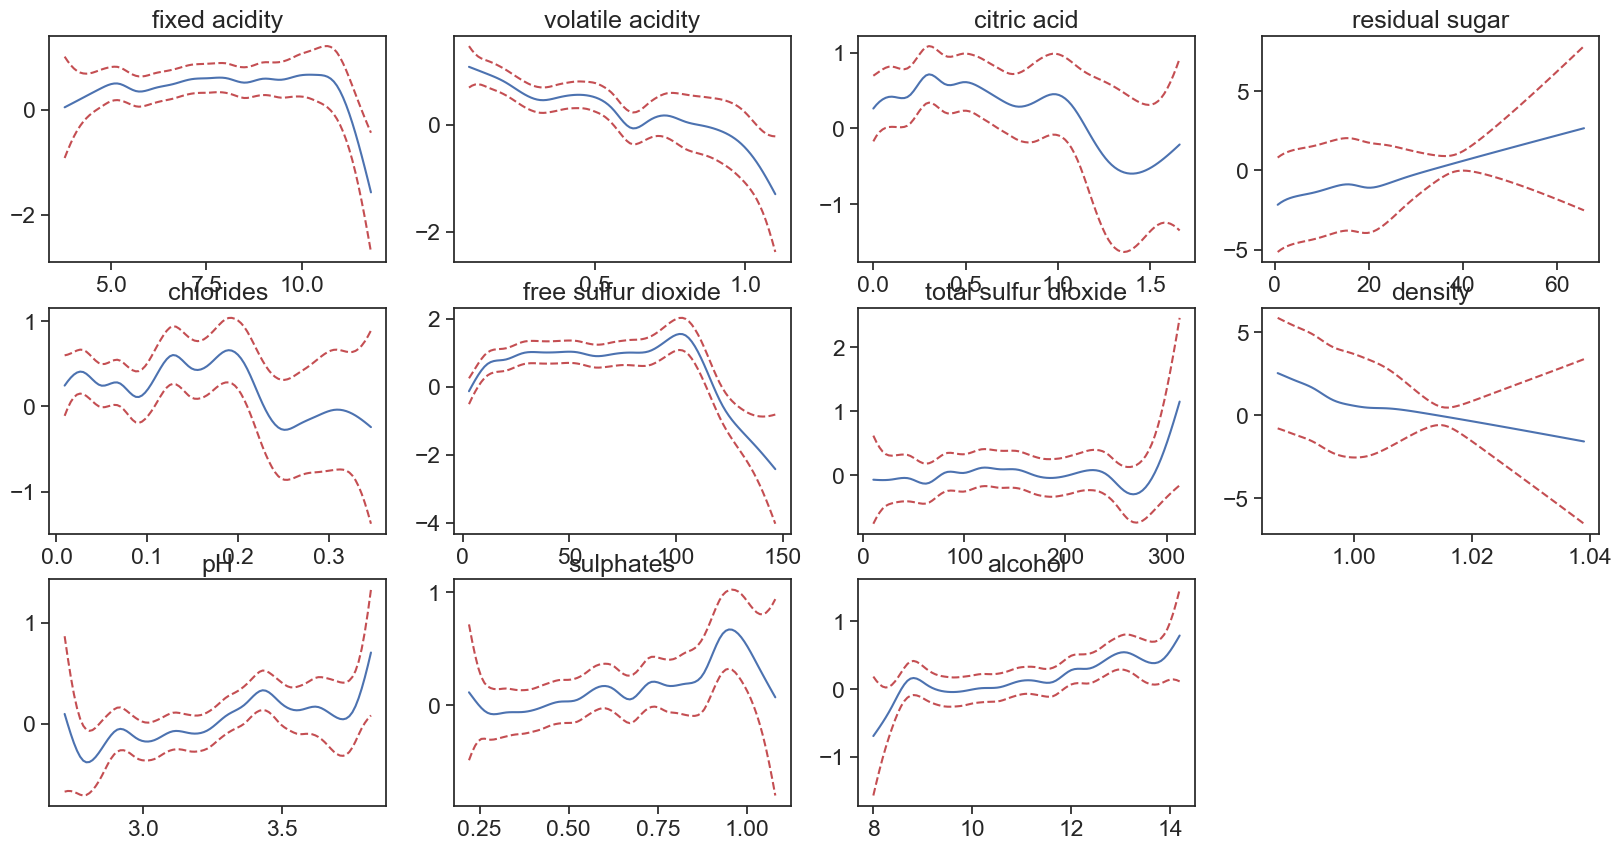

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset with the correct delimiter
wines = pd.read_csv('/Volumes/Macintosh HD - Daten/GAM/model_checkpoints/downloads/arch.ics.uci.edu_ml_mach-lear-data_wine-qu5LgVXAwKUbZ9-7Dzn24RQzWFFF_fKhBDB_Ym1MhkyA0.csv', delimiter=';')

# Display basic information about the dataset
print(wines.info())
print(wines.head())

# Split the data into features and target variable
X = wines.drop(columns=['quality'])
y = wines['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Generalized Additive Model (GAM)
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10))
gam.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gam.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize the model
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(3, 4, i + 1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    plt.title(wines.columns[i])

plt.show()


# GA^2M performance

In [1]:
%pip install interpret

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade dash flask werkzeug

Defaulting to user installation because normal site-packages is not writeable
  Using cached dash-2.17.1-py3-none-any.whl (7.5 MB)
  Using cached flask-3.0.3-py3-none-any.whl (101 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl (227 kB)
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 2.0.2
    Uninstalling Werkzeug-2.0.2:
      Successfully uninstalled Werkzeug-2.0.2
  Attempting uninstall: flask
    Found existing installation: Flask 2.0.2
    Uninstalling Flask-2.0.2:
      Successfully uninstalled Flask-2.0.2
  Attempting uninstall: dash
    Found existing installation: dash 2.0.0
    Uninstalling dash-2.0.0:
      Successfully uninstalled dash-2.0.0
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install dash==2.0.0 flask==2.0.2 werkzeug==2.0.2

Defaulting to user installation because normal site-packages is not writeable
  Using cached dash-2.0.0-py3-none-any.whl (7.3 MB)
  Using cached Flask-2.0.2-py3-none-any.whl (95 kB)
  Using cached Werkzeug-2.0.2-py3-none-any.whl (288 kB)
  Attempting uninstall: werkzeug
    Found existing installation: werkzeug 3.0.3
    Uninstalling werkzeug-3.0.3:
      Successfully uninstalled werkzeug-3.0.3
  Attempting uninstall: flask
    Found existing installation: flask 3.0.3
    Uninstalling flask-3.0.3:
      Successfully uninstalled flask-3.0.3
  Attempting uninstall: dash
    Found existing installation: dash 2.17.1
    Uninstalling dash-2.17.1:
      Successfully uninstalled dash-2.17.1
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pandas scikit-learn interpret dash flask werkzeug


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install dash==2.0.0 flask==2.0.2 werkzeug==2.0.2

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip freeze | grep -E 'dash|flask|werkzeug'


dash==2.0.0
dash-core-components==2.0.0
dash-cytoscape==1.0.1
dash-html-components==2.0.0
dash-table==5.0.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from interpret import show

# Load the dataset with the correct delimiter
wines = pd.read_csv('/Volumes/Macintosh HD - Daten/GAM/model_checkpoints/downloads/arch.ics.uci.edu_ml_mach-lear-data_wine-qu5LgVXAwKUbZ9-7Dzn24RQzWFFF_fKhBDB_Ym1MhkyA0.csv', delimiter=';')

# Display basic information about the dataset
print(wines.info())
print(wines.head())

# Split the data into features and target variable
X = wines.drop(columns=['quality'])
y = wines['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the GA²M model
ebm = ExplainableBoostingRegressor(interactions=10)
ebm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ebm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize the model
# Global explanations
ebm_global = ebm.explain_global()
show(ebm_global)

# Local explanations for the first data point
ebm_local = ebm.explain_local(X_test[:1], y_test[:1])
show(ebm_local)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         

/Users/positive-expectations/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<!-- http://127.0.0.1:7001/4961060512/ -->

<!-- http://127.0.0.1:7001/4979374784/ -->

# Summary of Model Performance Comparison

Generalized Additive Model (GAM) vs. GA²M (Generalized Additive Model with Interactions)
Performance Metrics:

# GAM:

Mean Squared Error (MSE): 0.6316
R-squared: 0.1844

# GA²M:

Mean Squared Error (MSE): 0.4450
R-squared: 0.4254
Interpretation:

# Mean Squared Error (MSE):

GA²M has a significantly lower MSE (0.4450) compared to GAM (0.6316), indicating more accurate predictions.
R-squared:

GA²M has a higher R-squared (0.4254) compared to GAM (0.1844), indicating it explains a larger portion of the variance in wine quality.
Insights:

# Model Complexity and Interactions:

GA²M includes interaction terms between features, allowing it to capture more nuanced relationships in the data that GAM cannot. This additional complexity likely contributes to the better performance of GA²M, as it can model more nuanced relationships in the data.
# Predictive Performance:

The lower MSE and higher R-squared for GA²M indicate better predictive performance, suggesting that interactions between features are crucial in predicting wine quality. This suggests that interactions between features are important in predicting wine quality, and the GA²M's ability to capture these interactions results in more accurate predictions.
# Variance Explained:

GA²M explains over 42% of the variance in wine quality, compared to only 18% by GAM, showing the importance of feature interactions. This substantial improvement indicates that the interaction terms play a crucial role in understanding and predicting wine quality.
# Conclusion:

GA²M outperforms GAM in predicting wine quality, highlighting the importance of modeling interactions between features. The GA²M's ability to capture these interactions results in significantly better accuracy and explanatory power.

